#Trabalho Final Descritiva e Probabilidade
Alunos: Felipe Magno, Fabiano Antunes, Gabriela Araújo

## Análise 1: Estatística Descritiva do banco de microdados ENADE 2017

Instalando e Carregando os pacotes necessários

In [ ]:
vetor_pacotes=c("readr",
                "ggplot2",
                "plotly",
                "e1071",
                "dplyr",
                "Hmisc",
                "DescTools",
                "esquisse",
                "kableExtra",
                "gridExtra",
                "devtools",
                "tidyr",
                "patchwork",
                "gridExtra"
)
install.packages(vetor_pacotes)

lapply(vetor_pacotes,
       require,
       character.only = TRUE)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’, ‘reactR’, ‘R.utils’, ‘checkmate’, ‘rootSolve’, ‘lmom’, ‘classInt’, ‘reactable’, ‘rio’, ‘toastui’, ‘writexl’, ‘lazyeval’, ‘crosstalk’, ‘proxy’, ‘htmlTable’, ‘viridis’, ‘colorspace’, ‘Formula’, ‘mvtnorm’, ‘expm’, ‘Exact’, ‘gld’, ‘datamods’, ‘phosphoricons’, ‘shinybusy’, ‘shinyWidgets’, ‘svglite’


Loading required package: readr

Loading required package: ggplot2

Loading required package: plotly


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


Loading required package: e1071

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

### A) Importando o banco de dados ENADE 17

In [ ]:
enade2017 = read_csv2("MICRODADOS_ENADE_2017.txt")

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 537436 Columns: 150
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (56): TP_SEXO, DS_VT_GAB_OFG_ORIG, DS_VT_GAB_OFG_FIN, DS_VT_GAB_OCE_ORIG...
dbl (94): NU_ANO, CO_IES, CO_CATEGAD, CO_ORGACAD, CO_GRUPO, CO_CURSO, CO_MOD...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
head(enade2017) #permite uma visão geral da base sem precisar visualizar a base toda

NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,⋯,QE_I72,QE_I73,QE_I74,QE_I75,QE_I76,QE_I77,QE_I78,QE_I79,QE_I80,QE_I81
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2017,1,1,10028,5710,3,1,5103403,51,5,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2017,1,1,10028,5710,3,1,5103403,51,5,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2017,1,1,10028,5710,3,1,5103403,51,5,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2017,1,1,10028,5710,3,1,5103403,51,5,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2017,1,1,10028,5710,3,1,5103403,51,5,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2017,1,1,10028,5710,3,1,5103403,51,5,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


###B) Selecionando as variáveis indicadas <br>
*adicionamos algumas variáveis que consideramos interessantes para as análises

In [ ]:
microdados_enade_filtrados= enade2017 %>% dplyr::select(CO_GRUPO,
                                                       TP_SEXO,
                                                       CO_TURNO_GRADUACAO,
                                                       CO_REGIAO_CURSO,
                                                       QE_I02,
                                                       NT_OBJ_FG,
                                                       QE_I08,
                                                       QE_I23,
                                                       NT_OBJ_CE,
                                                       NT_GER
)
head(microdados_enade_filtrados)

CO_GRUPO,TP_SEXO,CO_TURNO_GRADUACAO,CO_REGIAO_CURSO,QE_I02,NT_OBJ_FG,QE_I08,QE_I23,NT_OBJ_CE,NT_GER
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
5710,F,3,5,A,87.5,B,D,52.6,52.6
5710,F,3,5,D,87.5,B,C,63.2,63.1
5710,M,3,5,D,87.5,F,B,26.3,33.7
5710,M,3,5,A,75.0,B,C,57.9,58.1
5710,M,3,5,A,75.0,F,B,36.8,46.3
5710,M,3,5,F,87.5,C,B,63.2,64.2


**Classificando as variáveis:**<br>


**1.   Variáveis indicadas na questão:**
*  **NT_OBJ_FG**: Nota bruta na parte objetiva da formação geral ->  **Variável Quantitativa Contínua** <br>
* **CO_GRUPO:** Código da área de enquadramento do curso no Enade -> **Variável Qualitativa Nominal** <br>
*  **CO_REGIAO_CURSO**: Código da região de funcionamento do curso->  **Variável Qualitativa Nominal** <br>
*  **QE_I02**: Questionário de qual cor/raça -> **Variável Qualitativa Nominal** <br>
* **CO_TURNO_GRADUACAO**: Código do turno de graduação -> **Variável Qualitativa Ordinal** <br>

**2.   Outras variáveis utilizadas:**
* **TP_SEXO:** Tipo de Sexo -> **Variável Qualitativa Nominal** <br>
*  **QE_I08**: Renda familiar ->  **Variável Qualitativa Ordinal** <br>
*  **QE_I23**: Horas dedicadas aos estudos -> **Variável Qualitativa Ordinal** <br>
*  **NT_OBJ_CE**: Nota bruta na parte objetiva da formação geral -> **Variável Quantitativa Contínua** <br>
*  **NT_GER**: Nota bruta da prova -> **Variável Quantitativa Contínua** <br>

### C) Filtrando pelo Curso escolhido
####Foi escolhido aleatoriamente o curso 6208
CO_GRUPO==6208  [6208 = Engenharia de Produção]


In [ ]:
microdados_ti = microdados_enade_filtrados %>% filter(CO_GRUPO==6208)
head(microdados_ti)

CO_GRUPO,TP_SEXO,CO_TURNO_GRADUACAO,CO_REGIAO_CURSO,QE_I02,NT_OBJ_FG,QE_I08,QE_I23,NT_OBJ_CE,NT_GER
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
6208,M,3,3,A,62.5,E,E,59.1,55.6
6208,F,3,3,A,87.5,F,E,81.8,72.6
6208,F,3,3,C,87.5,E,B,40.9,50.3
6208,F,3,3,C,87.5,F,B,36.4,45.2
6208,M,3,3,C,75.0,F,C,31.8,40.9
6208,F,3,3,A,75.0,C,C,68.2,62.5


### D)Transformação de variáveis, colocando os rótulos
 usando o Mutate (criando coluna nao DataFrame)*(usando case - when)

In [ ]:
#Raça
microdados_ti = microdados_ti %>% mutate(raca = case_when( QE_I02 == "A" ~ "Branca",
                                                                    QE_I02 == "B" ~ "Preta",
                                                                    QE_I02 == "C" ~ "Amarela",
                                                                    QE_I02 == "D" ~ "Parda",
                                                                    QE_I02 == "E" ~ "Indígena",
														                                  			QE_I02 == "E" ~ "Não quero declarar"

))

#Região
microdados_ti = microdados_ti %>% mutate(regiao = case_when( CO_REGIAO_CURSO == 1 ~ "Norte",
                                                             CO_REGIAO_CURSO == 2 ~ "Nordeste",
                                                             CO_REGIAO_CURSO == 3 ~ "Sudeste",
                                                             CO_REGIAO_CURSO == 4 ~ "Sul",
                                                             CO_REGIAO_CURSO == 5 ~ "Centro-Oeste"
))

#sexo
microdados_ti = microdados_ti %>% mutate(sexo = case_when( TP_SEXO == "M" ~ "Masculino",
                                                           TP_SEXO == "F" ~ "Feminino"
))


#Horas de estudo
microdados_ti = microdados_ti %>% mutate(hestudos = case_when( QE_I23 == "A" ~ "Nenhuma, apenas assisto as aulas",
                                                               QE_I23 == "B" ~ "De uma a três",
                                                               QE_I23 == "C" ~ "De quatro a sete",
                                                               QE_I23 == "D" ~ "De oito a doze",
                                                               QE_I23 == "E" ~ "Mais de doze"
))

#Renda familiar
microdados_ti = microdados_ti %>% mutate(hsalario = case_when(   QE_I08 == "A" ~ "Até 1,5 salário mínimo (até R$ 1.405,50)",
                                                                 QE_I08 == "B" ~ "De 1,5 a 3 salários mínimos (R$ 1.405,51 a R$ 2.811,00)",
                                                                 QE_I08 == "C" ~ "De 3 a 4,5 salários mínimos (R$ 2.811,01 a R$ 4.216,50)",
                                                                 QE_I08 == "D" ~ "De 4,5 a 6 salários mínimos (R$ 4.216,51 a R$ 5.622,00)",
                                                                 QE_I08 == "E" ~ "De 6 a 10 salários mínimos (R$ 5.622,01 a R$ 9.370,00)",
                                                                 QE_I08 == "F" ~ "De 10 a 30 salários mínimos (R$ 9.370,01 a R$ 28.110,00)",
                                                                 QE_I08 == "G" ~ "Acima de 30 salários mínimos (mais de R$ 28.110,00)"
))

#Turno
microdados_ti = microdados_ti %>% mutate(hturno = case_when(  CO_TURNO_GRADUACAO == 1 ~ "Matutino",
                                                                CO_TURNO_GRADUACAO == 2 ~ "Vespertino",
                         									                    	CO_TURNO_GRADUACAO == 3 ~ "Noturno",
															                                  CO_TURNO_GRADUACAO == 4 ~ "Integral",
														                                		CO_TURNO_GRADUACAO == 5 ~ "Não realizei estágio curricular obrigatório"
))

### E) Estatísticas Descritivas do banco de dados

Estatísticas Descritivas



no rmarkdown incluí um código que mostra tbm média, mediana mas também mostra se tem NA, desvio padrão, e um mini histograma com a distribuição. O pacote não roda aqui no collab por alguma limitação

In [ ]:
summary(microdados_ti) #mostra as estatísticas básicas (média, mediana, quartis, mínimos e máximos)

    CO_GRUPO      TP_SEXO          CO_TURNO_GRADUACAO CO_REGIAO_CURSO
 Min.   :6208   Length:25714       Min.   :1.000      Min.   :1.000  
 1st Qu.:6208   Class :character   1st Qu.:3.000      1st Qu.:3.000  
 Median :6208   Mode  :character   Median :4.000      Median :3.000  
 Mean   :6208                      Mean   :3.574      Mean   :3.032  
 3rd Qu.:6208                      3rd Qu.:4.000      3rd Qu.:3.000  
 Max.   :6208                      Max.   :4.000      Max.   :5.000  
                                   NA's   :162                       
    QE_I02            NT_OBJ_FG        QE_I08             QE_I23         
 Length:25714       Min.   :  0.0   Length:25714       Length:25714      
 Class :character   1st Qu.: 37.5   Class :character   Class :character  
 Mode  :character   Median : 50.0   Mode  :character   Mode  :character  
                    Mean   : 53.4                                        
                    3rd Qu.: 62.5                                     

In [ ]:
#Removendo  Na
microdados_ti_sem_NA = microdados_ti %>% na.omit()

#Conferindo se NA's foram removidos
resumo_teste_variaveis= microdados_ti_sem_NA %>%
  select(everything()) %>%
  summarise_all(list(~sum(is.na(.))))
 resumo_teste_variaveis

CO_GRUPO,TP_SEXO,CO_TURNO_GRADUACAO,CO_REGIAO_CURSO,QE_I02,NT_OBJ_FG,QE_I08,QE_I23,NT_OBJ_CE,NT_GER,raca,regiao,sexo,hestudos,hsalario,hturno
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### F) Análises do comportamento da nota

Análise por Turno

In [ ]:
# Resumo estatístico com assimetria e curtose
 dados_nt_hturno <- microdados_ti_sem_NA %>%
  select(NT_GER, hturno) %>%
  group_by(hturno) %>%
  summarise(
    quantidade = n(),
    media = mean(NT_GER),
    mediana = median(NT_GER),
    cv = sd(NT_GER) / media * 100,
    amplitude_interquartil = IQR(NT_GER),
    assimetria = skewness(NT_GER),
    curtose = kurtosis(NT_GER)
  ) %>%
  arrange(desc(cv))

print( dados_nt_hturno)

# Histograma das notas gerais por turno do curso
grafico_histograma_turno = ggplot(microdados_ti_sem_NA, aes(x = NT_GER, fill = hturno)) +
  geom_histogram(binwidth = 2, color = "black", alpha = 0.7, position = "identity") +
  ggtitle("Histograma da Nota Geral por Turno do Curso") +
  xlab("Nota Geral (NT_GER)") +
  ylab("Frequência Simples") +
  facet_grid(~hturno) +
  theme_minimal(base_size = 13) +
  scale_fill_brewer(palette = "Set2", name = "Turno")

grafico_histograma_turno

# Boxplot NT_GER por turno
ggplot(microdados_ti_sem_NA, aes(x = hturno, y = NT_GER, fill = hturno)) +
  geom_boxplot(outlier.color = "black", outlier.shape = 21, outlier.fill = "white") +
  labs(title = "Boxplot da Nota Geral (NT_GER) por Turno",
       x = "Turno",
       y = "Nota Geral") +
  theme_minimal() +
  theme(legend.position = "none")

# A tibble: 4 × 8
  hturno     quantidade media mediana    cv amplitude_interquartil assimetria
  <chr>           <int> <dbl>   <dbl> <dbl>                  <dbl>      <dbl>
1 Matutino         1653  42.5    41.6  32.0                   19.2     0.239 
2 Integral        15868  39.9    39.4  29.7                   15.9     0.278 
3 Vespertino        363  44.7    44.4  27.9                   18.3     0.187 
4 Noturno          3743  48.4    48.3  27.7                   18.8     0.0176
# ℹ 1 more variable: curtose <dbl>


Os dados indicam que os alunos do turno Noturno apresentam o melhor desempenho médio e a menor variabilidade nas notas, com distribuição quase simétrica. O turno Integral, embora mais numeroso, concentra as menores médias e maior assimetria. Matutino e Vespertino têm desempenhos intermediários, sendo o Matutino o mais disperso. Essas diferenças sugerem que fatores externos, como perfil dos estudantes ou estrutura dos cursos, podem influenciar o desempenho conforme o turno.

Análise por Região e Turno

`summarise()` has grouped output by 'regiao'. You can override using the
`.groups` argument.


# A tibble: 20 × 9
# Groups:   regiao [5]
   regiao       hturno     quantidade media mediana    cv amplitude_interquartil
   <chr>        <chr>           <int> <dbl>   <dbl> <dbl>                  <dbl>
 1 Centro-Oeste Vespertino         11  35.1    34    47.0                   15.7
 2 Sudeste      Matutino         1155  42.9    42    33.3                   20.6
 3 Norte        Matutino           37  38.8    40.3  31.1                   21.3
 4 Centro-Oeste Integral          538  38.7    37.7  30.8                   16.3
 5 Norte        Integral          436  37.6    37.1  30.2                   15.2
 6 Nordeste     Noturno           524  45.6    45.4  30.2                   19.7
 7 Sudeste      Integral        10831  39.8    39.2  29.9                   15.9
 8 Nordeste     Integral         1689  38.4    37.8  29.8                   15.3
 9 Sul          Matutino           46  42.7    41.2  28.8                   19.6
10 Nordeste     Matutino          368  41.4    40.8  28.7          

ERROR while rich displaying an object: Error in `geom_histogram()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'turno' not found

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 

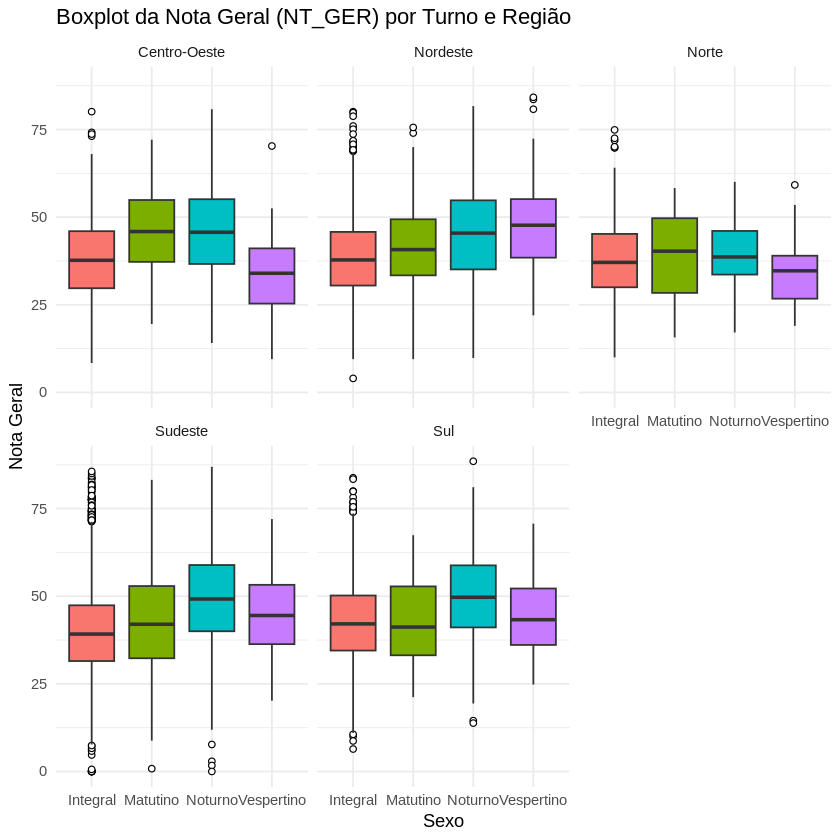

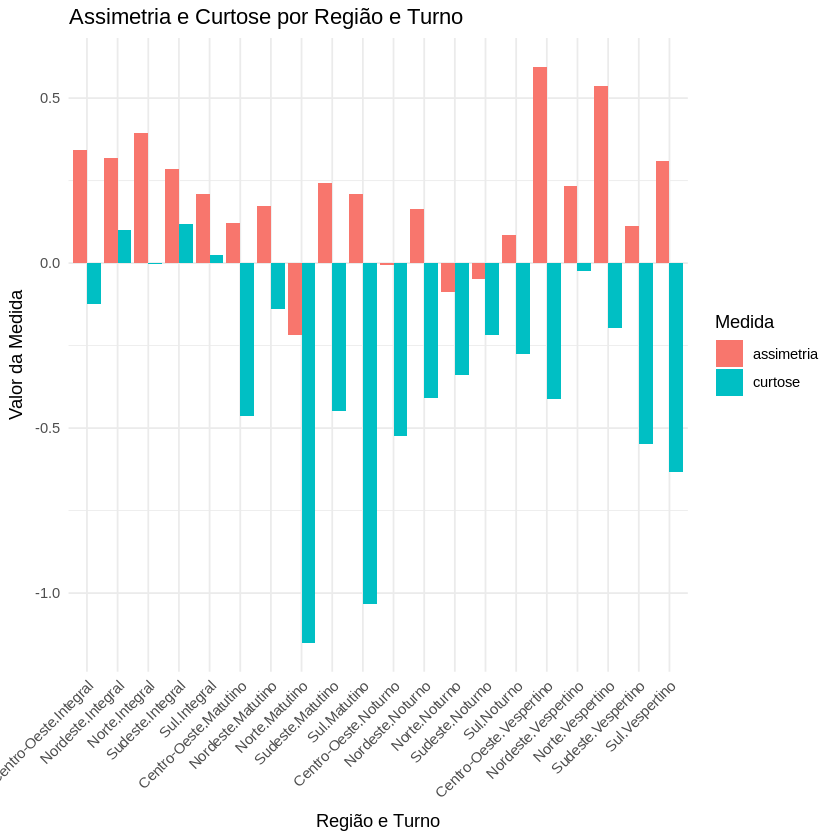

In [ ]:
# Função para moda (caso necessário em análises futuras)
Mode <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}

# Resumo estatístico com assimetria e curtose, agora por raca
dados_hturno_regiao <- microdados_ti_sem_NA %>%
  select(regiao, NT_GER, hturno) %>%
  group_by(regiao, hturno) %>%
  summarise(
    quantidade = n(),
    media = mean(NT_GER, na.rm = TRUE),
    mediana = median(NT_GER, na.rm = TRUE),
    cv = sd(NT_GER, na.rm = TRUE) / media * 100,
    amplitude_interquartil = IQR(NT_GER, na.rm = TRUE),
    assimetria = skewness(NT_GER, na.rm = TRUE),
    curtose = kurtosis(NT_GER, na.rm = TRUE)
  ) %>%
  arrange(desc(cv))

# Visualizar tabela (opcional)
print(dados_hturno_regiao)


# Gráfico 1: Boxplot NT_GER por sexo e região
ggplot(microdados_ti_sem_NA, aes(x = hturno, y = NT_GER, fill = hturno)) +
  geom_boxplot(outlier.color = "black", outlier.shape = 21, outlier.fill = "white") +
  facet_wrap(~ regiao) +
  labs(title = "Boxplot da Nota Geral (NT_GER) por Turno e Região",
       x = "Sexo",
       y = "Nota Geral") +
  theme_minimal() +
  theme(legend.position = "none")

# Gráfico 2: Histograma com densidade
ggplot(microdados_ti_sem_NA, aes(x = NT_GER, fill = hturno)) +
  geom_histogram(aes(y = ..density..), bins = 30, alpha = 0.6, position = "identity") +
  geom_density(alpha = 0.7, color = "black") +
  facet_wrap(~ regiao) +
  labs(title = "Distribuição da Nota Geral (NT_GER) por Turno e Sexo",
       x = "Nota Geral",
       y = "Densidade") +
  theme_minimal()

# Gráfico 3: Barras com assimetria e curtose por grupo
# Transforma os dados para formato longo para gráfico de barras
dados_longos <- dados_hturno_regiao %>%
  select(regiao, hturno, assimetria, curtose) %>%
  tidyr::pivot_longer(cols = c("assimetria", "curtose"), names_to = "medida", values_to = "valor")

ggplot(dados_longos, aes(x = interaction(regiao, hturno), y = valor, fill = medida)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Assimetria e Curtose por Região e Turno",
       x = "Região e Turno",
       y = "Valor da Medida",
       fill = "Medida") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


Os dados analisados indicam que há, sim, diferenças de desempenho entre os turnos, mas essas diferenças não são uniformes em todas as regiões. Embora o turno noturno tenha apresentado médias superiores em vários contextos, o desempenho dos estudantes varia significativamente de acordo com a região. O turno matutino, que inicialmente poderia ser associado a um melhor desempenho, não se destacou de forma consistente, e o turno integral, apesar de mais numeroso, apresentou média inferior em diversas regiões. Portanto, não é possível afirmar que um turno é universalmente superior aos demais — o padrão de desempenho está relacionado a características regionais e contextuais.